In [1]:
import numpy as np 
import h5py 
import sys,os
import pandas as pd 
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, RBF
os.chdir('../')
sys.path.append('./src/data')
sys.path.append('./src/events')
sys.path.append('./src/probability')

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
Ereco = np.array([5.623413,  7.498942, 10. , 13.335215, 17.782795, 23.713737, 31.622776, 42.16965 , 56.23413])
zreco = np.array([-1., -0.75, -0.5 , -0.25,  0., 0.25, 0.5, 0.75, 1.])

In [92]:

df

[-0.625  0.125 -0.875 -0.125 -0.375  0.375  0.625  0.875]


,pdg,pid,reco_coszen,reco_energy,true_coszen,true_energy,type,weight,Ebin,zbin
135878,14,1,-0.625,11.7,-0.881053,4.071509,2,2.179285e-10,2,1
135891,14,1,-0.625,6.6,-0.790186,2.681794,3,6.596992e-11,0,1
135896,14,1,-0.625,8.7,-0.980585,4.933139,1,3.780049e-10,1,1
135897,14,1,0.125,20.7,-0.017054,4.828043,1,3.555752e-10,4,4
135899,14,1,-0.875,20.7,-0.911355,4.784835,2,3.471021e-10,4,0
...,...,...,...,...,...,...,...,...,...,...
791205,-14,1,0.125,11.7,-0.028724,18.182701,0,2.087045e-08,2,4
791214,-14,1,-0.375,27.7,-0.191371,69.671318,0,1.171372e-06,5,2
791215,-14,1,0.125,15.6,0.627232,51.288513,0,4.641680e-07,3,4
791217,-14,1,-0.875,6.6,0.683731,83.509705,0,2.083283e-06,0,0


NameError: name 'df' is not defined

In [82]:
def get_true_models():
    filename = './src/data/files/DC/sample_b/neutrino_mc.csv'
    df = (pd.read_csv(filename)
        .query('pdg == 14 or pdg == -14') #only muon (anti)neutrinos
        .query('pid == 1 ')) # only tracks
    df['Ebin'] = pd.cut(df.reco_energy, bins=Ereco, labels=False)
    df['zbin'] = pd.cut(df.reco_coszen, bins=zreco, labels=False)
    
    def train(df):
        X = np.array([df.reco_coszen, np.log(df.reco_energy)]).reshape(-1, 2)
        y = np.array([df.true_coszen, np.log(df.true_energy)]).reshape(-1, 2)
        kernel2  = 1.0 * RBF() + WhiteKernel(noise_level=3)
        gpr = GaussianProcessRegressor(kernel=kernel2,random_state=0).fit(X, y)
        return gpr

    models = []
    for zbin in range(8):
        for Ebin in range(8):
            df_sub = df.query(f'Ebin=={Ebin} ad zbin=={zbin}')
            models.append(train(df_sub))
    models = np.array(models).reshape(8,8)
    return models

MemoryError: Unable to allocate 763. MiB for an array with shape (10000, 10000, 1) and data type float64

In [52]:
gpr.predict(np.array([-0.5,1]).reshape(1, -1))

array([[-0.41319485,  0.86433703]])

In [ ]:
from scipy.stats import lognorm
import matplotlib.pyplot as plt

In [75]:
test = df.sample(100)
X_test= test[['reco_coszen', 'reco_energy']].values
X_test[:,1] = np.log(X_test[:,1] )
y_test= test[['true_coszen', 'true_energy' ]].values
y_test[:,1] = np.log(y_test[:,1] )

In [97]:
y_test[:,0]

array([ 7.12628484e-01,  1.34450540e-01,  5.11934102e-01, -9.39014554e-01,
       -4.64468181e-01, -6.98232055e-01,  1.32589370e-01, -7.81616032e-01,
       -4.11126047e-01,  1.27934396e-01, -9.61449623e-01,  5.99615574e-01,
       -4.63107765e-01, -9.87303078e-01,  3.55908394e-01, -2.53713243e-02,
        9.85009193e-01,  1.77989528e-01,  2.91533172e-01,  5.11422038e-01,
       -2.82157868e-01, -9.30487037e-01, -8.88403594e-01, -5.83616495e-01,
       -3.74194026e-01,  5.95589518e-04, -8.68947864e-01, -5.03680885e-01,
       -4.45550114e-01,  5.94603904e-02, -4.09926593e-01,  5.92150152e-01,
       -9.07665491e-01, -8.16212475e-01, -7.16322482e-01, -6.43772483e-01,
       -7.08145142e-01,  9.61415827e-01,  8.45044613e-01, -4.77232426e-01,
       -5.71030319e-01,  5.72556734e-01,  1.45294726e-01, -5.15482187e-01,
        8.16628993e-01, -6.48319483e-01, -3.73844087e-01, -1.56344011e-01,
       -4.77080755e-02, -2.03280225e-01, -7.49031723e-01,  5.38602293e-01,
       -8.82448912e-01,  

In [98]:
std_base_e

array([0.40789501, 0.40905331, 0.40921365, 0.41055664, 0.42030346,
       0.41999813, 0.41654422, 0.41576738, 0.41077503, 0.41654422,
       0.43801544, 0.40921365, 0.42088157, 0.45726936, 0.4111918 ,
       0.43202609, 0.40555191, 0.42724992, 0.41705459, 0.40921365,
       0.41625533, 0.41654422, 0.41975224, 0.41328727, 0.41600647,
       0.42557451, 0.41576738, 0.41654422, 0.41328727, 0.41975224,
       0.4128604 , 0.41841961, 0.4128604 , 0.43124799, 0.41600647,
       0.4128604 , 0.41975224, 0.40692816, 0.40764085, 0.42557451,
       0.40757706, 0.40622496, 0.41398031, 0.41625533, 0.41154919,
       0.41055664, 0.43202609, 0.42030346, 0.42088157, 0.42088157,
       0.41625533, 0.40614405, 0.43057113, 0.40789501, 0.40757706,
       0.41281669, 0.41097692, 0.41448942, 0.4105389 , 0.40921365,
       0.4135447 , 0.40692816, 0.41518006, 0.44682013, 0.42240756,
       0.40905331, 0.43801544, 0.43124799, 0.41841961, 0.41625533,
       0.41654422, 0.40686888, 0.44796483, 0.44682013, 0.40937

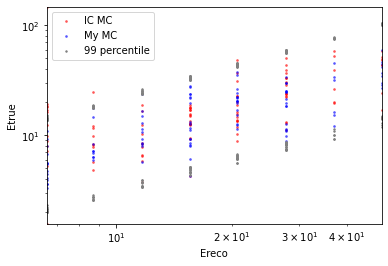

In [79]:
mu_base_e, std_base_e = gpr.predict(X_test, return_std=True)
mu_base_e= mu_base_e[:,1]
Etrue_rvs = lognorm.rvs(s=std_base_e, scale=np.exp(mu_base_e), random_state=0)
plt.figure()
plt.scatter(np.exp(X_test[:,1]), np.exp(y_test[:,1]),s=3, alpha=0.5, c='r', label='IC MC')
plt.scatter(np.exp(X_test[:,1]), Etrue_rvs,s=3, alpha=0.5, c='blue', label='My MC')
plt.scatter(np.exp(X_test[:,1]),lognorm.ppf(1-0.99, s=std_base_e, scale= np.exp(mu_base_e)), c='grey', s=2, label='99 percentile')
plt.scatter(np.exp(X_test[:,1]),lognorm.ppf(0.99, s=std_base_e, scale= np.exp(mu_base_e)), c='grey', s=2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Ereco')
plt.ylabel('Etrue')
plt.xlim((np.exp(X_test[:,1]).min(),np.exp(X_test[:,1]).max()))
plt.ylim((np.exp(y_test[:,1]).min(),np.exp(y_test[:,1]).max()))
plt.legend()